In [2]:
%load_ext autoreload
%autoreload 2
import os
os.environ['XLA_PYTHON_CLIENT_PREALLOCATE'] = 'false'
from nequix.data import *
from load_atoms import load_dataset
from ase.io import read, extxyz
import numpy as np
import matplotlib.pyplot as plt
import jax
import matplotlib.pyplot as plt
from nequix.model import Nequix

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
species = [1, 6, 7, 8, 16]
atomic_indices = atomic_numbers_to_indices(species)

In [4]:
ds = load_dataset('QM7', 'data')

Output()

In [5]:
basis = {1:1, 6:5, 7:5, 8:5, 16:9}
max(ds, key = lambda x: sum([basis[a] for a in x.get_atomic_numbers()]))

Atoms(symbols='C7H16', pbc=False)

In [6]:
7*5 + 16

51

In [7]:
graph_ds = Dataset('data/QM7.extxyz', atomic_indices, 'data')
dl = DataLoader(graph_ds, 23, 490, 15, 210, 64)

In [8]:
a = next(iter(dl))
a

/scratch/lmucko/.local/share/uv/python/cpython-3.10.18-linux-x86_64-gnu/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


GraphsTuple(nodes={'forces': None, 'positions': array([[ 0.99826, -0.00246, -0.00436],
       [ 2.09021, -0.00243,  0.00414],
       [ 0.63379,  1.02686,  0.00414],
       ...,
       [ 0.     ,  0.     ,  0.     ],
       [ 0.     ,  0.     ,  0.     ],
       [ 0.     ,  0.     ,  0.     ]], dtype=float32), 'species': array([1, 0, 0, ..., 0, 0, 0], dtype=int32)}, edges={'shifts': array([[ 0., -1., -1.],
       [ 0., -1., -1.],
       [ 0., -1., -1.],
       ...,
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]], dtype=float32)}, receivers=array([  0,   0,   0, ..., 640, 640, 640], dtype=int32), senders=array([  1,   2,   3, ..., 640, 640, 640], dtype=int32), globals=None, n_node=array([  5,   8,   6,   4,   9,   7,   9,   9,  11,   9,   7,   8,  10,
         6,  10,   7,  10,  12,  10,  11,  11,  13,   7,   5,  13,   9,
        12,  13,  11,  13,  11,  11,   9,  10,  10,  12,   8,  12,  12,
        10,  10,  12,  10,  10,   6,  10,   8,   9,  14,   9,   9,   9,


In [11]:
P = scf_density_matrix(ds[0], 'sto-3g')

converged SCF energy = -39.7265814231022


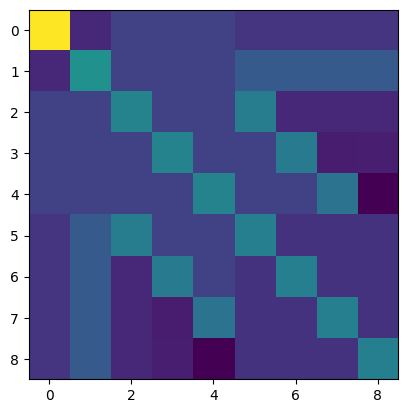

In [12]:
plt.imshow(P)

In [13]:
basis_irreps_e3nn('sto-3g')

['1x0e', '2x0e + 1x1o', '2x0e + 1x1o', '2x0e + 1x1o', '3x0e + 2x1o']

In [20]:
model = Nequix(jax.random.key(69), basis='sto-3g')

In [21]:
batch = next(iter(dl))
P, mask_P, G_mask = model(batch)

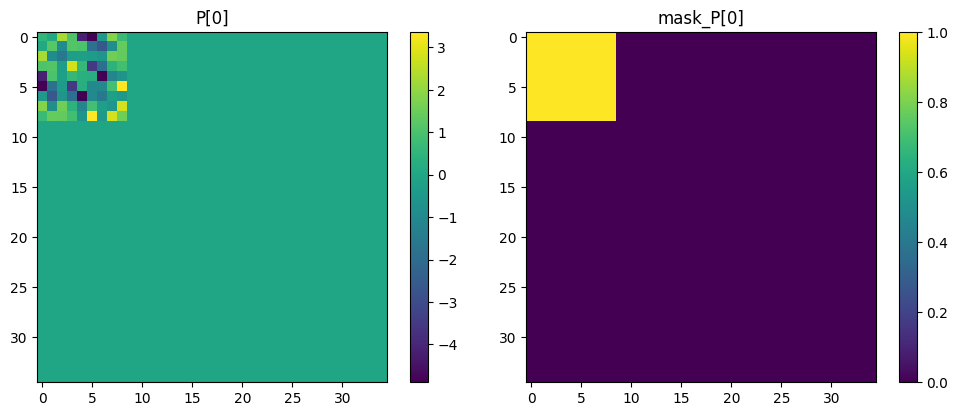

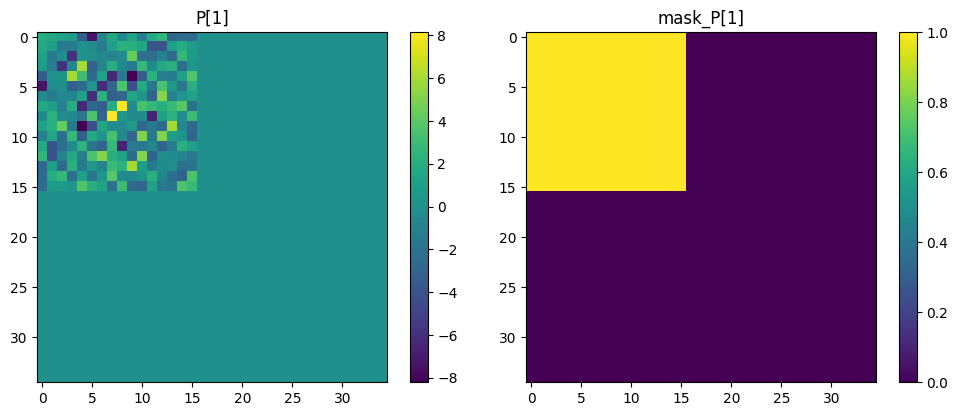

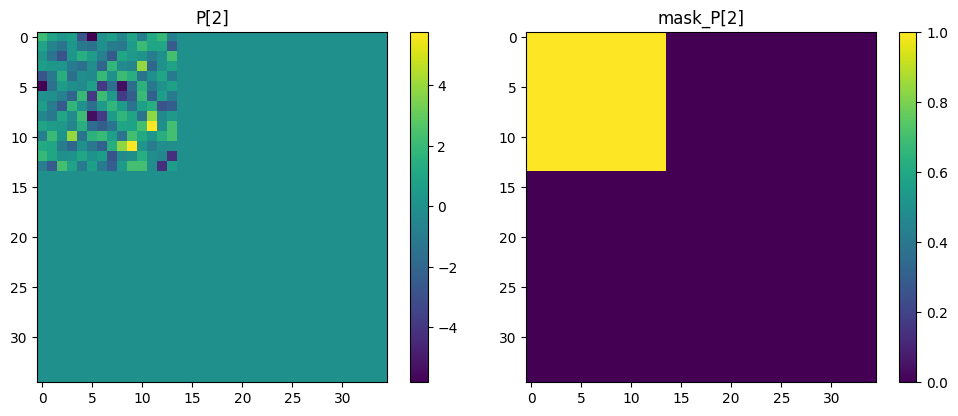

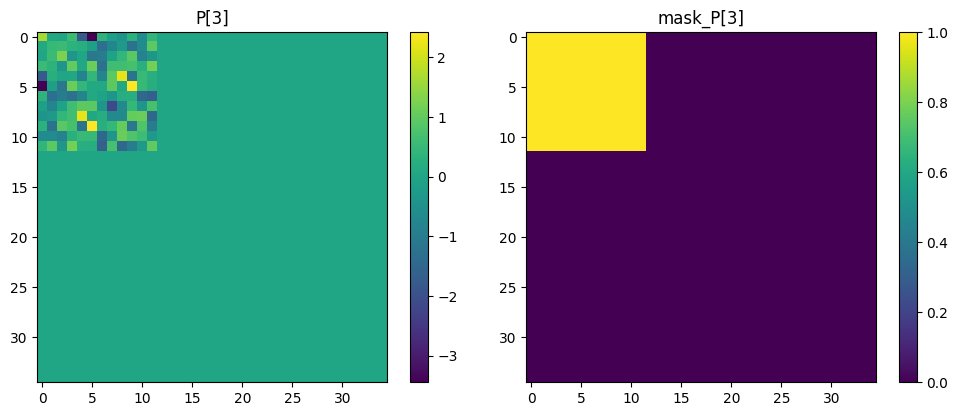

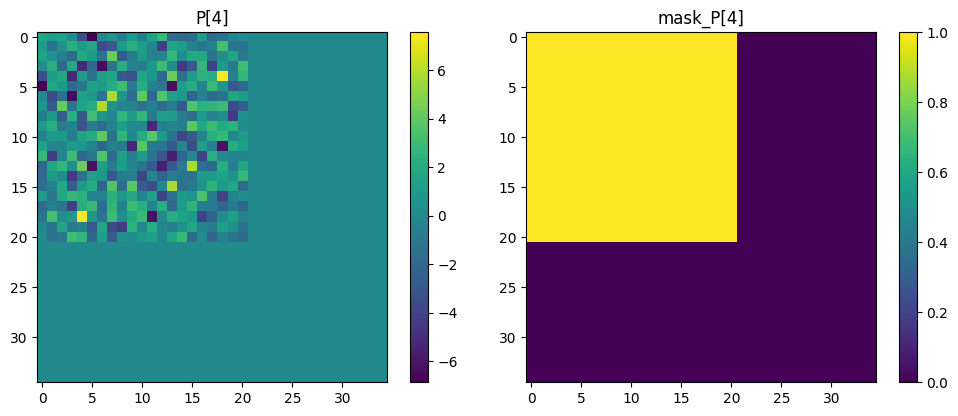

In [27]:
import matplotlib.pyplot as plt

for i in range(5):
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    im0 = axs[0].imshow(P[i])
    axs[0].set_title(f"P[{i}]")
    plt.colorbar(im0, ax=axs[0])
    im1 = axs[1].imshow(mask_P[i])
    axs[1].set_title(f"mask_P[{i}]")
    plt.colorbar(im1, ax=axs[1])
    plt.tight_layout()
    plt.show()
